## Four algorithms in Qiskit Part 3

In [1]:
# Importing libraries and necessary tools

from qiskit import *
import numpy as np
import math
import random
from qiskit.visualization import plot_histogram

from qiskit.providers.fake_provider import FakeJakarta, FakeNairobi
from qiskit_textbook.tools import simon_oracle

### Simon's Algorithm

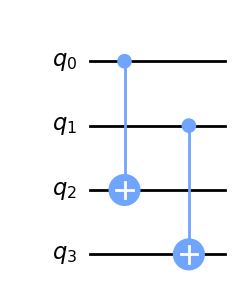

In [2]:
""" Simon oracle has been imported from qiskit textbook to be used in the algorithm"""

oracle = simon_oracle('00')
oracle.draw('mpl')

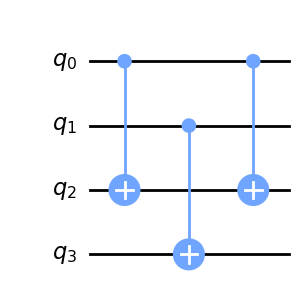

In [3]:
oracle = simon_oracle('01')
oracle.draw('mpl')

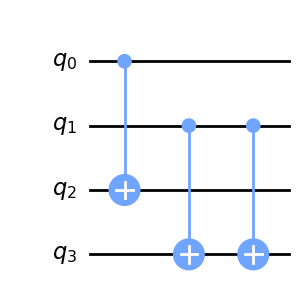

In [4]:
oracle = simon_oracle('10')
oracle.draw('mpl')

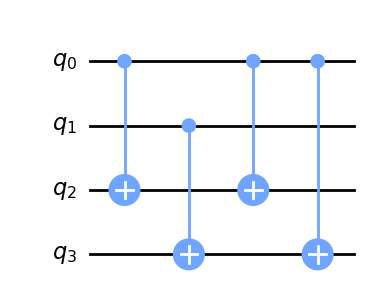

In [5]:
oracle = simon_oracle('11')
oracle.draw('mpl')

In [6]:
""" Defining a function for Simon's algorithm 
    Input: N - Length of the bitstring 'a'
           oracle1- black box encoding the function
    Output: qc - the quantum circuit to be run on a simulator to get the final output """

def Simon(oracle, N):

    
    # Creating the quantum circuit of '2N' qubits where N is the number of bits in the input bitstring
    
    qc = QuantumCircuit(N*2, N)

    # Applying Hadamard gates on all qubits to create superposition
    
    qc.h(range(N))        
    qc.barrier()                   # Barrier for better visualization
    
    # Appending the oracle for the funtion to the quantum circuit
    
    qc.append(oracle, range(2*N))
    qc.barrier()                   # Barrier for better visualization

    # Applying Hadamard gates to all the input qubits
    
    qc.h(range(N))
    qc.barrier()                   # Barrier for better visualization

    # Measuring input qubits to find the linearly independent strings
    
    qc.measure(range(N), range(N))
    
    return qc

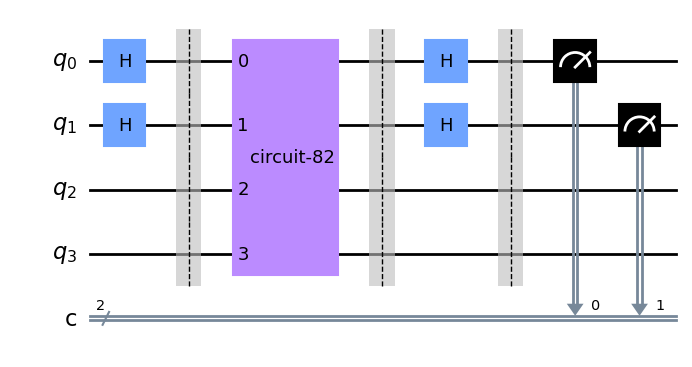

In [7]:
# Testing the algorithm for a = '10'
a = '10'
N = len(a)
ora = simon_oracle(a)

q1 = Simon(ora, N)
q1.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


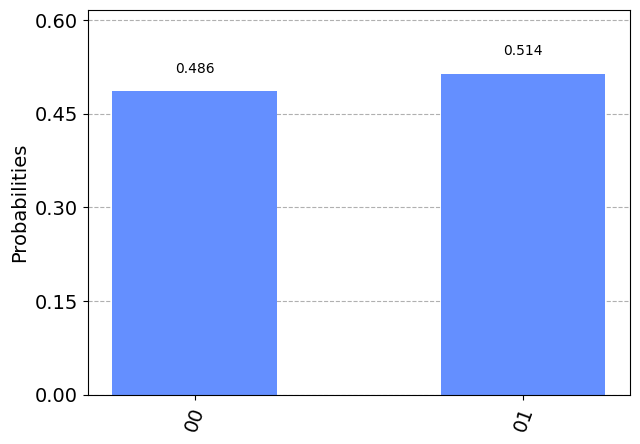

In [8]:
# Running on non-noisy simulator 1

backend = Aer.get_backend('aer_simulator')
job = execute(q1,backend, shots=1024)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

In [9]:
""" Getting the output strings in form of a list to find 'a' classically"""
res = list(counts.keys())
res

['01', '00']

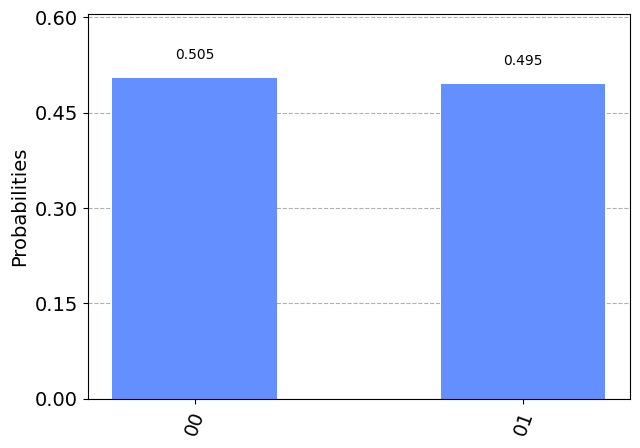

In [10]:
# Running on non-noisy simulator 2

backend = Aer.get_backend('qasm_simulator')
job = execute(q1,backend, shots=1024)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

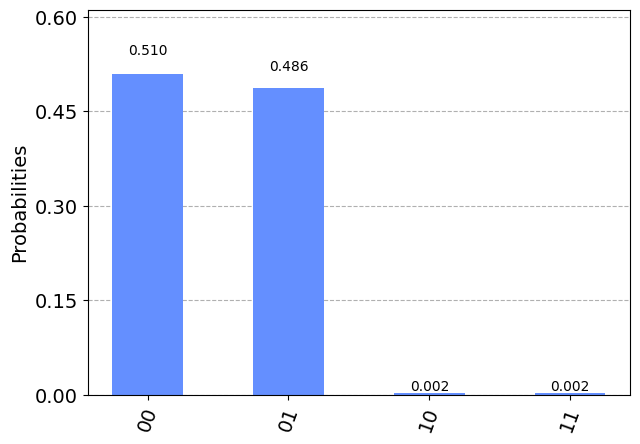

In [11]:
# Running on noisy simulator 1

backend = FakeJakarta()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

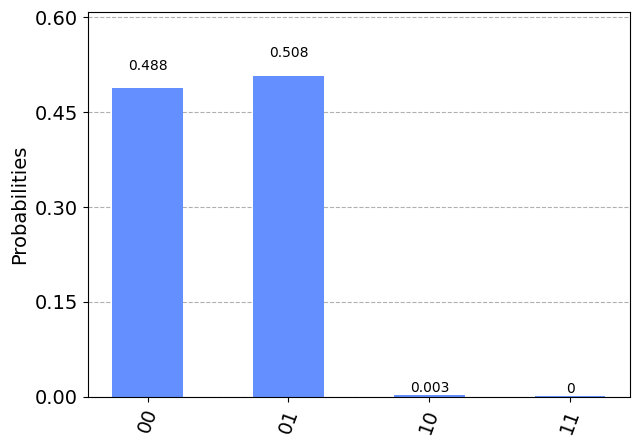

In [12]:
# Running on noisy simulator 2

backend = FakeNairobi()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

In [14]:
# Defining a function that gives the output directly without running many cells

# a - the bitstring(to be encoded as black box)
# sim: simulator on which you want to run the algorithm
#.    - 1: non-noisy aer simulator
#       2: non-noisy qasm simulator
#       3: noisy simulator FakeJakarta
#       4: noisy simulator FakeNairobi
# Output: counts, maximum number of counts are obtained for the linearly independent strings

def run(a, sim):
    
    oracle_1  = simon_oracle(a)

    N = len(a)
    q1 = Simon(oracle_1, N)
    
    count = 0
    
    if sim==1:
        
        backend = Aer.get_backend('aer_simulator')
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
    
    elif sim == 2:
        
        backend = Aer.get_backend('qasm_simulator')
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
        
    elif sim == 3:
        
        backend = FakeJakarta()
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
        
    else:
        
        backend = FakeNairobi()
        job = execute(q1,backend)
        results = job.result()
        counts = results.get_counts()
        count = counts
    
    return count

In [15]:
# Testing the algorithm for '110' on all 4 simulators

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


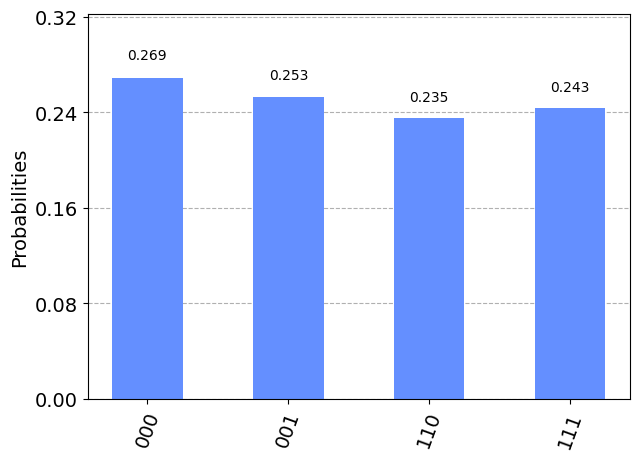

In [16]:
a = '110'
plot_histogram(run(a, 1))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


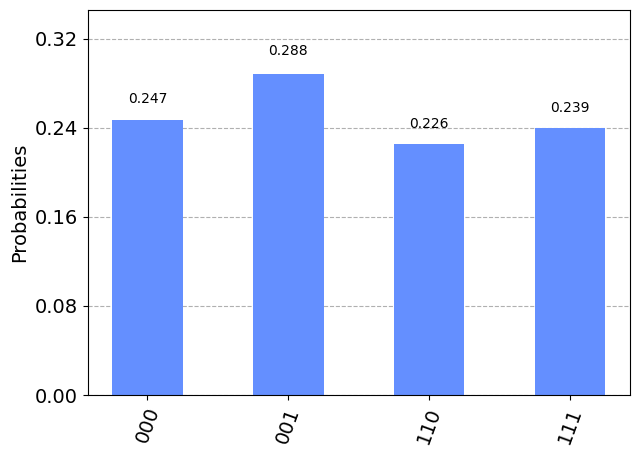

In [17]:
plot_histogram(run(a, 2))

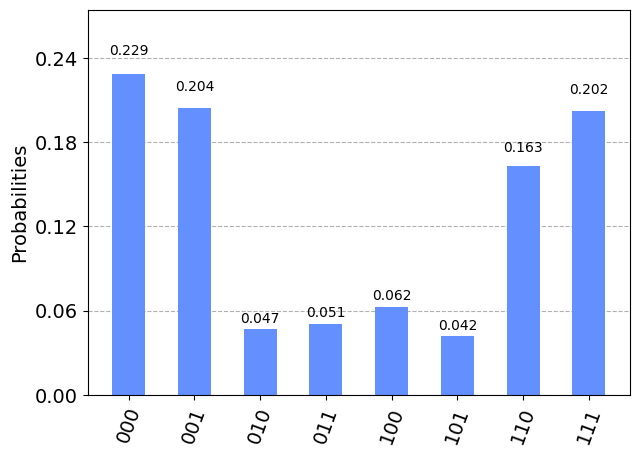

In [18]:
plot_histogram(run(a, 3))

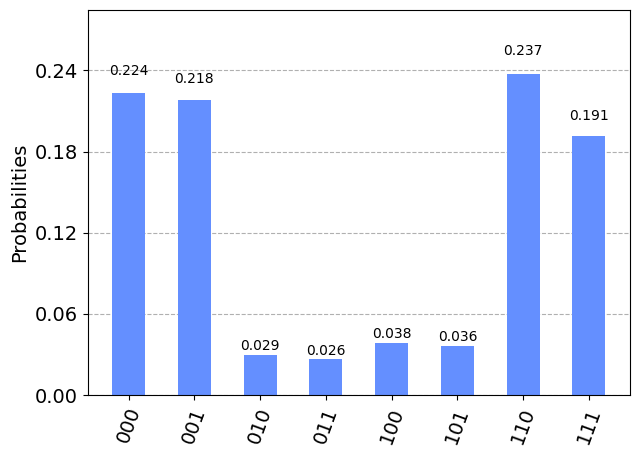

In [19]:
plot_histogram(run(a, 4))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


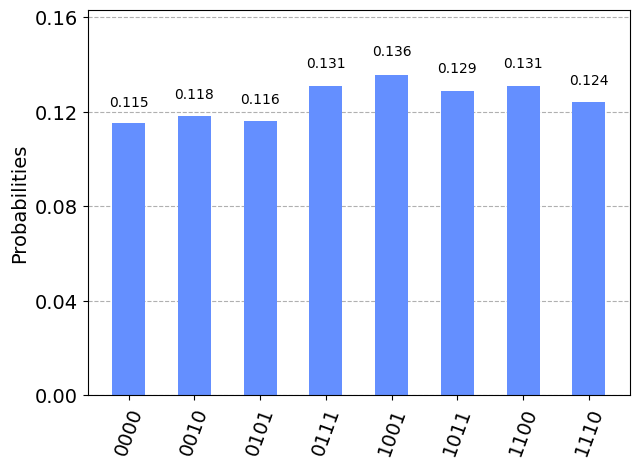

In [20]:
# Testing the algorithm for '1101' on all 4 simulators

a = '1101'

plot_histogram(run(a, 1))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


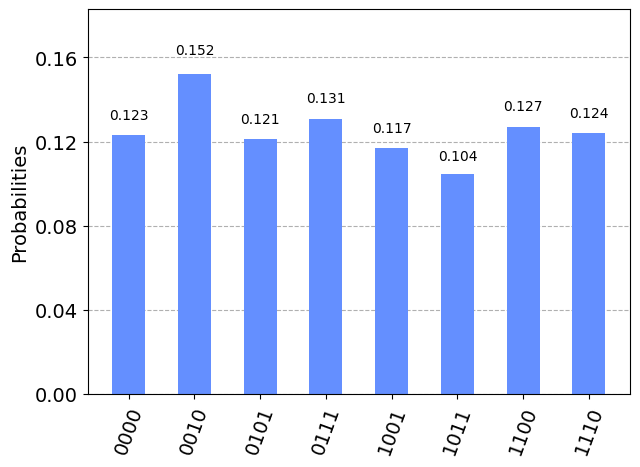

In [21]:
plot_histogram(run(a, 2))

In [22]:
plot_histogram(run(a, 3))

TranspilerError: 'Number of qubits (8) in circuit-4430 is greater than maximum (7) in the coupling_map'

In [23]:
plot_histogram(run(a, 4))

TranspilerError: 'Number of qubits (8) in circuit-4434 is greater than maximum (7) in the coupling_map'